##### Author: Alexander Porter

### **NOTE:** The data wrangling and exploratory data analysis performed in this project could have been more extensive, however the IBM Certification only required the tasks listed below to be completed because the purpose of the Capstone Project was to consolidate the understanding & application of several concepts and methodologies taught throughout the certification. 

### The required tasks below were sufficient to address the problem statement, uncovering the necessary insights and producing actionable recommendations.

### For certain tasks, I went beyond what was required to further my own learning and growth. 

### IBM **does not** release the solution/code for this Certification Capstone, therefore all code below is my own work.

### **Prerequisites: Import all libraries to be used in all four coding parts of the project and declare their aliases.**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import requests
import json
import os
from bs4 import BeautifulSoup
from io import StringIO

# Libraries below used only in Part 4
import sqlite3
import urllib.request

# store the current working directory
current_directory = os.getcwd()

# IBM Data Analyst Professional Certificate: Capstone Project | **Part 1 - Data Collection**

### Using the URL below, collect the number of job postings for the locations below and export them to an Excel file.

Locations:
* Los Angeles
* New York
* San Francisco
* Washington DC
* Seattle
* Austin
* Detroit

 The keys in the JSON file are: 
 * Job Title
 * Job Experience Required
 * Key Skills
 * Role Category
 * Location
 * Functional Area
 * Industry
 * Role 

**https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DA0321EN-SkillsNetwork/labs/module%201/Accessing%20Data%20Using%20APIs/jobs.json**

In [ ]:
# API URL to fetch job postings
api_url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DA0321EN-SkillsNetwork/labs/module%201/Accessing%20Data%20Using%20APIs/jobs.json"

# Call the API and get the response
response = requests.get(api_url)

filename = 'jobs.json'

# Check if the response is successful
if response.ok:
    with open(filename, 'w', encoding='utf-8') as f:
        f.write(response.text) # Save the downloaded JSON file for optional offline use
        print(f"Successfully exported {filename} to: {current_directory}")
    data = response.json()  # Parse the response as JSON
    print(f"Dataset ready for use.")
else:
    print("Failed to retrieve data from the API")

Successfully exported jobs.json to: c:\Users\_\Desktop\Coursera_Certs\IBM_DA_Prof_Cert\09_Capstone_Project
Dataset ready for use.


### **Optionally: If offline,** the dataset can be prepared for use by locally loading the JSON file saved in the previous code block:

In [4]:
filename = 'jobs.json'

try:
    with open(filename, 'r', encoding='utf-8') as file:
        data = json.load(file)
    print(f"Dataset ready for use.")
except FileNotFoundError:
    print(f"The file {filename} was not found.")
except json.JSONDecodeError:
    print("The file is not in valid JSON format.")

Dataset ready for use.


In [5]:
# List of locations to count job postings
locations = ["Los Angeles", "New York", "San Francisco", "Washington DC", "Seattle", "Austin", "Detroit"]
    
# Initialize a dictionary to hold counts
job_counts = {location: 0 for location in locations}
    
# Count job postings for each specified location
for job in data:
    if job['Location'] in job_counts:
        job_counts[job['Location']] += 1
    
# Convert the job_counts dictionary to a DataFrame for easier manipulation
job_counts_df = pd.DataFrame(list(job_counts.items()), columns=['Location', 'Number of Job Postings'])
    
# Sort the DataFrame based on the number of job postings in descending order
job_counts_df = job_counts_df.sort_values(by='Number of Job Postings', ascending=False)

# Save the DataFrame to an Excel file
filename = 'job-postings.xlsx'
job_counts_df.to_excel(filename, index=False)
print(f"Successfully exported {filename} to: {current_directory}")

Successfully exported job-postings.xlsx to: c:\Users\_\Desktop\Coursera_Certs\IBM_DA_Prof_Cert\09_Capstone_Project


### Create a bar chart displaying the number of job postings by location in descending order and export it to a PNG file.

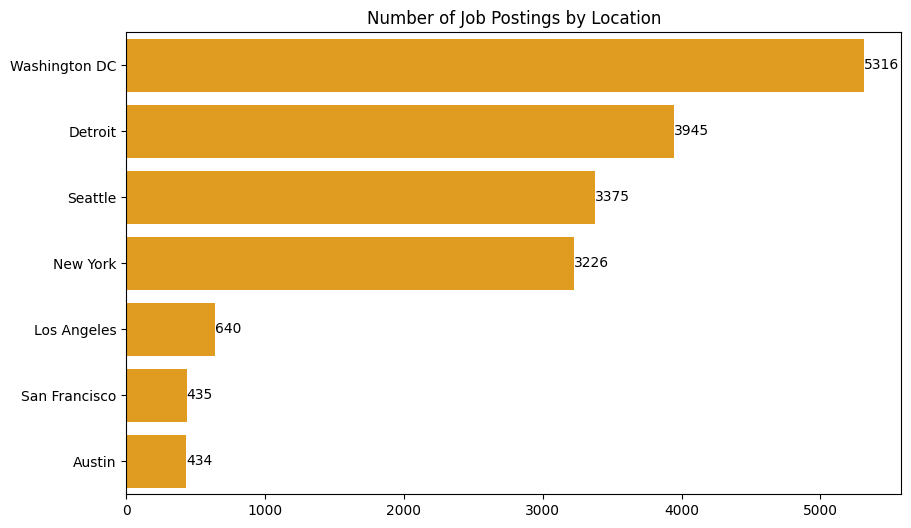

Successfully exported countJobs_by_location.png to: c:\Users\_\Desktop\Coursera_Certs\IBM_DA_Prof_Cert\09_Capstone_Project


In [6]:
# Generate the bar chart using seaborn
plt.figure(figsize=(10, 6))
sns.barplot(x='Number of Job Postings', y='Location', data=job_counts_df, color='orange')

plt.xlabel('')
plt.ylabel('')
plt.title('Number of Job Postings by Location')
plt.grid(False)

# Add data labels on the bars
for index, value in enumerate(job_counts_df['Number of Job Postings']):
    plt.text(value, index, f'{value}', va='center')  # Display count on the bars

filename = 'countJobs_by_location.png'
plt.savefig(filename)  # Save the figure to a file for use in the Appendix of the Presentation Slide deck
plt.show()  # Display the chart
print(f"Successfully exported {filename} to: {current_directory}")

### Using the URL below, scrape the **name of the programming language** and **average annual salary** from the table on the webpage and export the contents to a CSV file.

**https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DA0321EN-SkillsNetwork/labs/datasets/Programming_Languages.html**

In [ ]:
# Fetch the HTML content
html_url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DA0321EN-SkillsNetwork/labs/datasets/Programming_Languages.html"
response = requests.get(html_url)

# Parse the HTML to find the table
soup = BeautifulSoup(response.content, 'html.parser')
table = soup.find('table')

# 'table' is the HTML content as a string
html_content = str(table)

# Wrap it with StringIO
html_io = StringIO(html_content)

# Read the HTML using pd.read_html, only one table exists on the page
table_df = pd.read_html(html_io)[0]

# Ensure the index is reset and drop any entries that aren't actual data
table_df = table_df.reset_index(drop=True)

# Rename the columns appropriately
table_df.columns = ['No.', 'Language', 'Created By', 'Average Annual Salary', 'Learning Difficulty']
table_df = table_df[['Language', 'Average Annual Salary']]  # Only keep the relevant columns

# Clean and convert to float using `pd.to_numeric`:
table_df['Average Annual Salary'] = pd.to_numeric(table_df['Average Annual Salary'].replace('[\\$,]', '', regex=True), errors='coerce')

# Drop rows with NaN values in 'Average Annual Salary' column
table_df = table_df.dropna(subset=['Average Annual Salary'])

# Sort the DataFrame by 'Average Annual Salary' in descending order
table_df_sorted = table_df.sort_values(by='Average Annual Salary', ascending=False)

# Save the DataFrame to a CSV file
filename = 'popular-languages.csv'
table_df_sorted.to_csv(filename, index=False)
print(f"Successfully exported {filename} to: {current_directory}")

Successfully exported popular-languages.csv to: c:\Users\_\Desktop\Coursera_Certs\IBM_DA_Prof_Cert\09_Capstone_Project


### Create a column chart displaying the average salary by programming language in descending order and export it to a PNG file.

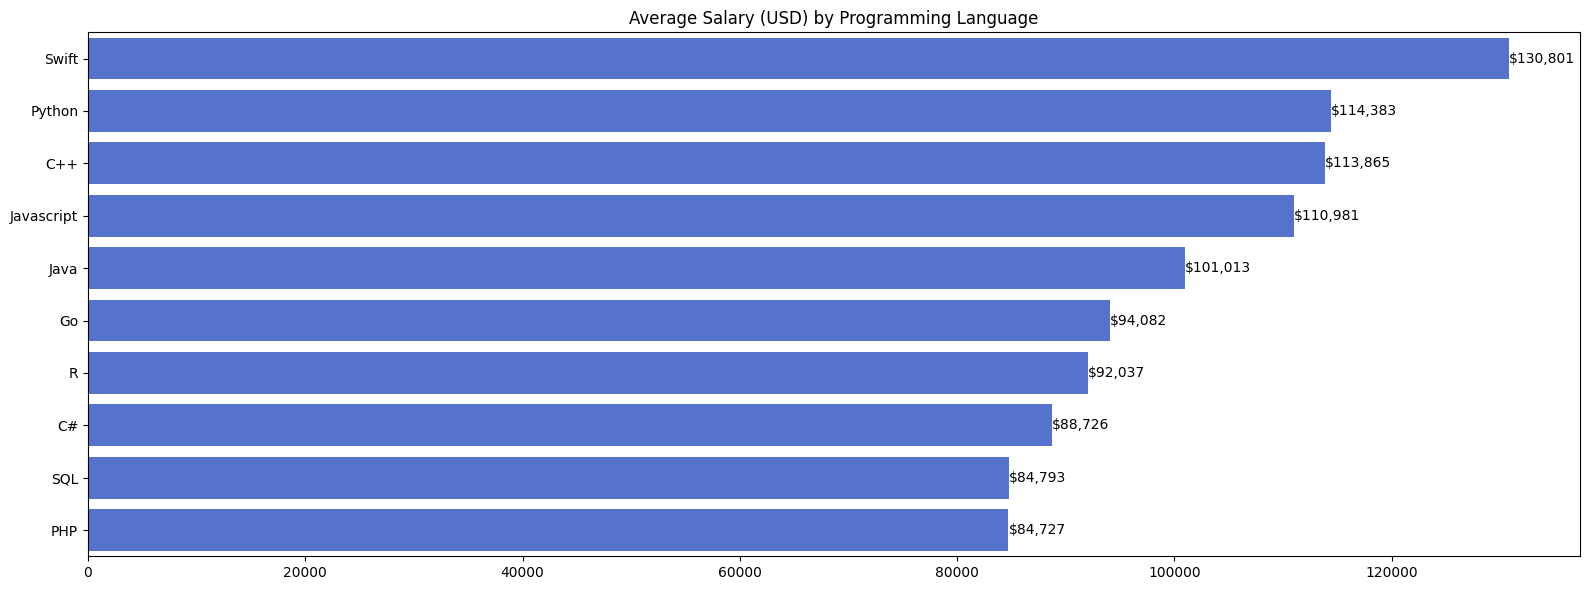

Successfully exported avgSalary_by_progLang.png to: c:\Users\_\Desktop\Coursera_Certs\IBM_DA_Prof_Cert\09_Capstone_Project


In [ ]:
# Create the horizontal bar chart using seaborn
plt.figure(figsize=(16, 6))
sns.barplot(data=table_df_sorted, y='Language', x='Average Annual Salary', color='royalblue')

# Titles and labels
plt.title('Average Salary (USD) by Programming Language')
plt.xlabel('')
plt.ylabel('')
plt.tight_layout()  # Adjust layout to make it neat

# Adding value labels formatted as currency to the bars
for index, value in enumerate(table_df_sorted['Average Annual Salary']):
    plt.text(value, index, f'${value:,.0f}', va='center')  # Add label formatted as currency

plt.grid(False)
filename = 'avgSalary_by_progLang.png'
plt.savefig('avgSalary_by_progLang.png')  # Save the figure to a file for use in the Appendix of the Presentation Slide deck
plt.show()
print(f"Successfully exported {filename} to: {current_directory}")

# IBM Data Analyst Professional Certificate: Capstone Project | **Part 2 - Data Wrangling**

###  Import the dirty dataset located at the URL below into a dataframe:

**https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DA0321EN-SkillsNetwork/LargeData/m1_survey_data.csv**

In [2]:
csv_url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DA0321EN-SkillsNetwork/LargeData/m1_survey_data.csv" # m1_survey_data.csv is the dirty dataset
p2_df = pd.read_csv(csv_url)

# Save the DataFrame to a CSV file
filename = 'm1_survey_data.csv'
p2_df.to_csv(filename, index=False) # Save the downloaded CSV file for optional offline use
print(f"Successfully exported {filename} to: {current_directory}")

Successfully exported m1_survey_data.csv to: c:\Users\_\Desktop\Coursera_Certs\IBM_DA_Prof_Cert\09_Capstone_Project


### **Optionally: If offline,** the dataset can be prepared for use by locally loading the CSV file saved in the previous code block:

In [3]:
filename = 'm1_survey_data.csv'
p2_df = pd.read_csv(filename)
print(f"Dataset ready for use.")

Dataset ready for use.


### Find out how many duplicate rows exist. Check for duplicate values in the `Respondent` column.

In [18]:
# Find the number of duplicate rows
num_duplicates = p2_df.duplicated().sum()
print(f'The number of duplicate rows in the dataframe is: {num_duplicates}')

# Check for duplicate values in the 'Respondent' column
duplicate_respondents = p2_df['Respondent'].duplicated().sum()
print("Number of duplicate respondents:", duplicate_respondents)

The number of duplicate rows in the dataframe is: 154
Number of duplicate respondents: 154


###  Remove the duplicates from the dataframe and verify if they were actually dropped.

In [12]:
# Check the number of rows before removing duplicates
initial_count = p2_df.shape[0]

# Create a copy of the DataFrame to avoid modifying the uncleaned original
df_cleaned = p2_df.copy()

# Remove duplicate rows
df_cleaned = df_cleaned.drop_duplicates()

# Check the number of rows after removing duplicates
final_count = df_cleaned.shape[0]

# Verify if duplicates were dropped
duplicates_dropped = initial_count - final_count

# Get the number of unique rows in the column 'Respondent'
unique_respondents = df_cleaned['Respondent'].nunique()

# Output the results
print(f"Initial number of rows: {initial_count}")
print(f"Final number of rows: {final_count}")
print(f"Duplicates dropped: {duplicates_dropped}")
print(f"Number of unique respondents: {unique_respondents}")

Initial number of rows: 11552
Final number of rows: 11398
Duplicates dropped: 154
Number of unique respondents: 11398


###  Find the missing values for all columns, then find out how many rows are missing in the columns `WorkLoc`, `ConvertedComp`, and `Country`. Finally, check for blank rows in `EdLevel`.

In [13]:
# Find the missing values for all columns
missing_values = df_cleaned.isnull().sum()
print("Missing values for all columns:")
print(missing_values)

# Find out how many rows are missing in the column 'WorkLoc'
missing_workloc = df_cleaned['WorkLoc'].isnull().sum()
print(f"\nNumber of missing rows in 'WorkLoc': {missing_workloc}")

# Find out how many rows are missing in the column 'ConvertedComp'
missing_convertedcomp = df_cleaned['ConvertedComp'].isnull().sum()
print(f"\nNumber of missing rows in 'ConvertedComp': {missing_convertedcomp}")

# How many rows are missing under the column 'Country'
missing_country = df_cleaned['Country'].isnull().sum()
print(f"Number of missing rows in 'Country': {missing_country}")

# Find how many blank rows are there under the column 'EdLevel'
blank_edlevel = df_cleaned['EdLevel'].isna().sum()  # count NaN values
blank_edlevel += (df_cleaned['EdLevel'] == '').sum()  # count empty strings
print(f"Number of blank rows in 'EdLevel': {blank_edlevel}")

Missing values for all columns:
Respondent        0
MainBranch        0
Hobbyist          0
OpenSourcer       0
OpenSource       81
               ... 
Sexuality       542
Ethnicity       675
Dependents      140
SurveyLength     19
SurveyEase       14
Length: 85, dtype: int64

Number of missing rows in 'WorkLoc': 32

Number of missing rows in 'ConvertedComp': 816
Number of missing rows in 'Country': 0
Number of blank rows in 'EdLevel': 112


###  Find the majority category under `Employment` as well as the category with minimum rows under `UndergradMajor`:

In [14]:
majority_employment = df_cleaned['Employment'].mode()[0]
print("Majority category under Employment:", majority_employment)

min_undergrad_major = df_cleaned['UndergradMajor'].value_counts().idxmin()
print("Category with minimum rows under UndergradMajor:", min_undergrad_major)

Majority category under Employment: Employed full-time
Category with minimum rows under UndergradMajor: A health science (ex. nursing, pharmacy, radiology)


###  Find the most frequent value in `WorkLoc` and use this value to impute the missing values. Find the median for `ConvertedComp` and use it to impute missing values. Verify all imputation.

In [15]:
# Impute with most frequent value
most_frequent_workloc = df_cleaned['WorkLoc'].value_counts().idxmax()
print("Most frequent value in WorkLoc:", most_frequent_workloc)
df_cleaned.fillna({'WorkLoc': most_frequent_workloc}, inplace=True)

# Verify imputation
missing_workloc = df_cleaned['WorkLoc'].isnull().sum()
print(f"Number of missing rows in 'WorkLoc': {missing_workloc}\n")

# Impute with median value
median_comp = df_cleaned['ConvertedComp'].median()
print(f"'ConvertedComp' median value: {median_comp}")
df_cleaned.fillna({'ConvertedComp': median_comp}, inplace=True)

# Verify imputation
missing_convertedcomp = df_cleaned['ConvertedComp'].isnull().sum()
print(f"Number of missing rows in 'ConvertedComp': {missing_convertedcomp}")

Most frequent value in WorkLoc: Office
Number of missing rows in 'WorkLoc': 0

'ConvertedComp' median value: 57745.0
Number of missing rows in 'ConvertedComp': 0


###  Normalizing data
There are two columns in the dataset that talk about compensation.
One is "CompFreq". This column shows how often a developer is paid (Yearly, Monthly, Weekly).
The other is "CompTotal". This column talks about how much the developer is paid per Year, Month, or Week depending upon his/her "CompFreq". 
This makes it difficult to compare the total compensation of the developers.
In this section you will create a new column called 'NormalizedAnnualCompensation' which contains the 'Annual Compensation' irrespective of the 'CompFreq'.
Once this column is ready, it makes comparison of salaries easy.

### Find the unique number of values in `CompFreq` and then determine how many respondents are being paid yearly with the cleaned dataset.

In [16]:
unique_comp_freq_values = df_cleaned['CompFreq'].nunique()
print("Unique values in CompFreq:", unique_comp_freq_values)

respondents_paid_yearly = df_cleaned[df_cleaned['CompFreq'] == 'Yearly'].shape[0]
print("Respondents being paid yearly after removing duplicates:", respondents_paid_yearly)

Unique values in CompFreq: 3
Respondents being paid yearly after removing duplicates: 6073


### List out the various categories in the column `CompFreq`, then create a new column named `NormalizedAnnualCompensation`. Finally, calculate the median of `NormalizedAnnualCompensation`.

In [17]:
unique_comp_freq_categories = df_cleaned['CompFreq'].dropna().unique()
print("Categories in CompFreq:", unique_comp_freq_categories)

# Define function to normalize annual compensation
def normalize_annual_compensation(row):
    if row['CompFreq'] == 'Yearly':
        return row['CompTotal']
    elif row['CompFreq'] == 'Monthly':
        return row['CompTotal'] * 12
    elif row['CompFreq'] == 'Weekly':
        return row['CompTotal'] * 52
    return None

# Create NormalizedAnnualCompensation column by invoking previously created function
df_cleaned.loc[:, 'NormalizedAnnualCompensation'] = df_cleaned.apply(normalize_annual_compensation, axis=1)

# Calculate the median of NormalizedAnnualCompensation
median_normalized_annual_compensation = df_cleaned['NormalizedAnnualCompensation'].median()
print("Median Normalized Annual Compensation:", median_normalized_annual_compensation)

Categories in CompFreq: ['Yearly' 'Monthly' 'Weekly']
Median Normalized Annual Compensation: 100000.0


# IBM Data Analyst Professional Certificate: Capstone Project | **Part 3 - Exploratory Data Analysis**

### Import the clean dataset located at the URL below into a dataframe.

**https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DA0321EN-SkillsNetwork/LargeData/m2_survey_data.csv**

In [2]:
p3_df = pd.read_csv("https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DA0321EN-SkillsNetwork/LargeData/m2_survey_data.csv") # m2_survey_data.csv is the cleaned dataset

# Save the DataFrame to a CSV file
filename = 'm2_survey_data.csv'
p3_df.to_csv(filename, index=False) # Save the downloaded CSV file for optional offline use
print(f"Successfully exported {filename} to: {current_directory}")

Successfully exported m2_survey_data.csv to: c:\Users\_\Desktop\Coursera_Certs\IBM_DA_Prof_Cert\09_Capstone_Project


### **Optionally: If offline,** the dataset can be prepared for use by locally loading the CSV file saved in the previous code block:

In [3]:
filename = 'm2_survey_data.csv'
p3_df = pd.read_csv(filename)
print(f"Dataset ready for use.")

Dataset ready for use.


### Plot the distribution curve for the column `ConvertedComp`.

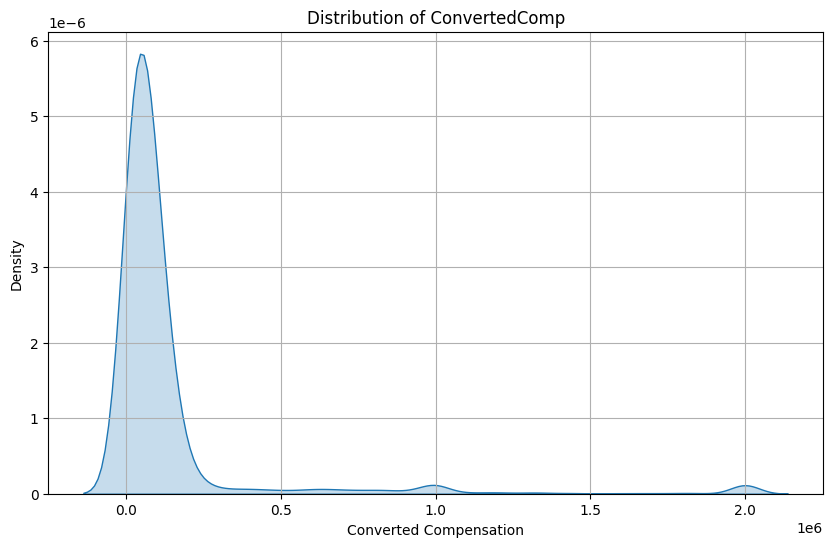

In [6]:
plt.figure(figsize=(10, 6))
sns.kdeplot(p3_df['ConvertedComp'], fill=True)
plt.title('Distribution of ConvertedComp')
plt.xlabel('Converted Compensation')
plt.ylabel('Density')
plt.grid()
plt.show()

### Plot the histogram for the column `ConvertedComp`.

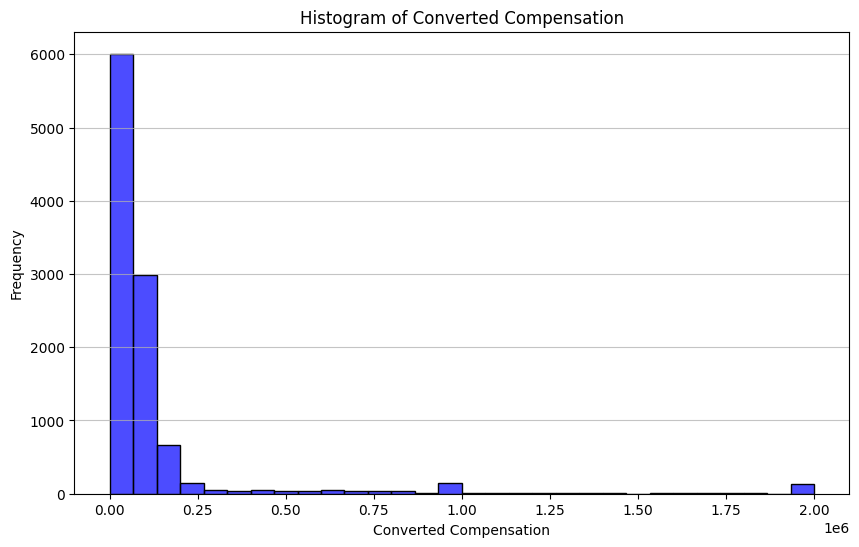

In [5]:
plt.figure(figsize=(10, 6))
sns.histplot(p3_df['ConvertedComp'], bins=30, color='blue', alpha=0.7)
plt.title('Histogram of Converted Compensation')
plt.xlabel('Converted Compensation')
plt.ylabel('Frequency')
plt.grid(axis='y', alpha=0.75)
plt.show()

### What is the median of the column `ConvertedComp`?

In [7]:
median_comp = p3_df['ConvertedComp'].median()
print(f"'ConvertedComp' median value: {median_comp}")

'ConvertedComp' median value: 57745.0


### How many responders identified themselves only as a **Man**?

In [8]:
# Filter for respondents who identify as 'Man'
men_respondents = p3_df[p3_df['Gender'] == 'Man']
count = men_respondents['Respondent'].count()
print(f"Respondents who identified themselves only as a Man: {count}")

Respondents who identified themselves only as a Man: 10480


### Find out the  median ConvertedComp of responders who identified themselves only as a **Woman**?

In [9]:
women_respondents = p3_df[p3_df['Gender'] == 'Woman']
median_converted_comp = women_respondents['ConvertedComp'].median()
print("median 'ConvertedComp' of respondents who identified themselves only as a Woman:", median_converted_comp)

median 'ConvertedComp' of respondents who identified themselves only as a Woman: 57708.0


### Give the five number summary for the column `Age`:

In [10]:
# Calculate the five-number summary for the 'Age' column
five_number_summary = {
    'Minimum': p3_df['Age'].min(),
    'Q1': p3_df['Age'].quantile(0.25),
    'Median': p3_df['Age'].median(),
    'Q3': p3_df['Age'].quantile(0.75),
    'Maximum': p3_df['Age'].max(),
}

# Display the five-number summary
print("5 number summary for 'Age' is:", five_number_summary)

5 number summary for 'Age' is: {'Minimum': np.float64(16.0), 'Q1': np.float64(25.0), 'Median': np.float64(29.0), 'Q3': np.float64(35.0), 'Maximum': np.float64(99.0)}


### Plot a histogram of the column `Age`.

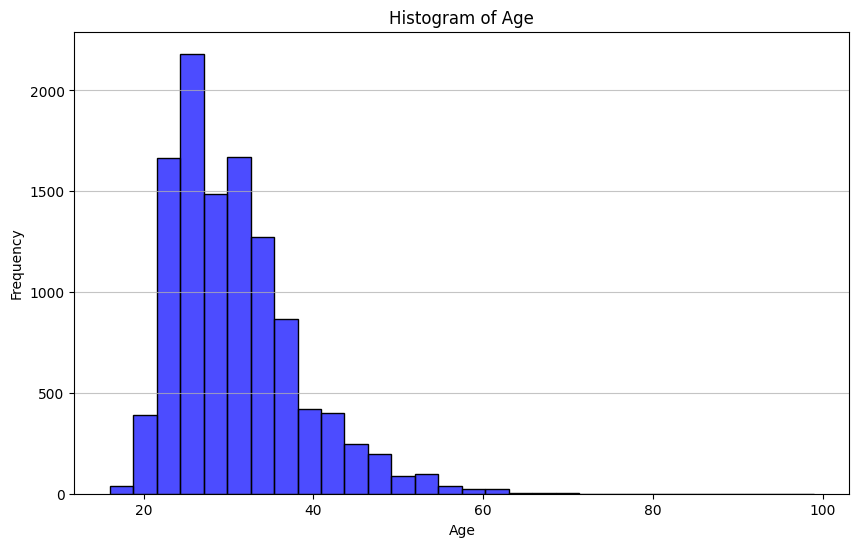

In [11]:
plt.figure(figsize=(10, 6))
sns.histplot(p3_df['Age'], bins=30, color='blue', alpha=0.7)
plt.title('Histogram of Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.grid(axis='y', alpha=0.75)
plt.show()

### Create a boxplot of the column `ConvertedComp`.

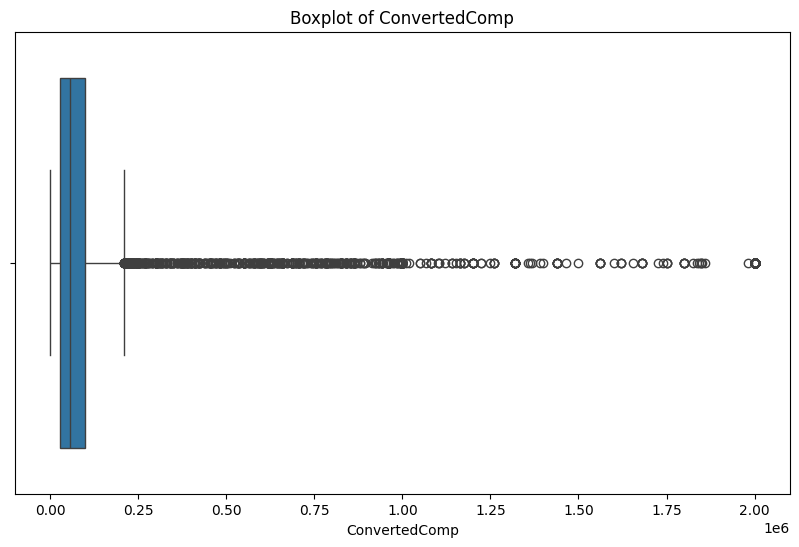

In [12]:
# Create a boxplot for the ConvertedComp column
plt.figure(figsize=(10, 6))
sns.boxplot(x=p3_df['ConvertedComp'])
plt.title("Boxplot of ConvertedComp")
plt.xlabel("ConvertedComp")
plt.show()

### Find the Inter Quartile Range, as well as the upper and lower bounds. If outliers exist, how many are there? If outliers exist, create a new dataframe by removing the outliers from the `ConvertedComp` column and find the median ConvertedComp before and after outliers removal.

In [13]:
# Define the IQR and the outlier boundaries for ConvertedComp
Q1 = p3_df['ConvertedComp'].quantile(0.25)
Q3 = p3_df['ConvertedComp'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Count outliers
outliers = p3_df[(p3_df['ConvertedComp'] < lower_bound) | (p3_df['ConvertedComp'] > upper_bound)]
outliers_count = len(outliers)

# Calculate the median of ConvertedComp before removing outliers
median_convertedcomp_before = p3_df['ConvertedComp'].median()

# Remove outliers
df_no_outliers = p3_df[(p3_df['ConvertedComp'] >= lower_bound) & (p3_df['ConvertedComp'] <= upper_bound)]

# Calculate the median and mean of ConvertedComp after removing outliers
median_convertedcomp_after = df_no_outliers['ConvertedComp'].median()
mean_convertedcomp_after = df_no_outliers['ConvertedComp'].mean()

# Printing the results
print("'ConvertedComp' calculations:\n")
print(f"Inter Quartile Range (IQR): {IQR}")
print(f"Upper bounds: {upper_bound}")
print(f"Lower bounds: {lower_bound}\n")
print(f"Number of outliers: {outliers_count}")
print(f"Median ConvertedComp before outliers removal: {median_convertedcomp_before}")
print(f"Median ConvertedComp after outliers removal: {median_convertedcomp_after}")

'ConvertedComp' calculations:

Inter Quartile Range (IQR): 73132.0
Upper bounds: 209698.0
Lower bounds: -82830.0

Number of outliers: 879
Median ConvertedComp before outliers removal: 57745.0
Median ConvertedComp after outliers removal: 52704.0


### Recreate a boxplot of the column `ConvertedComp` with all outliers removed from the original plot.

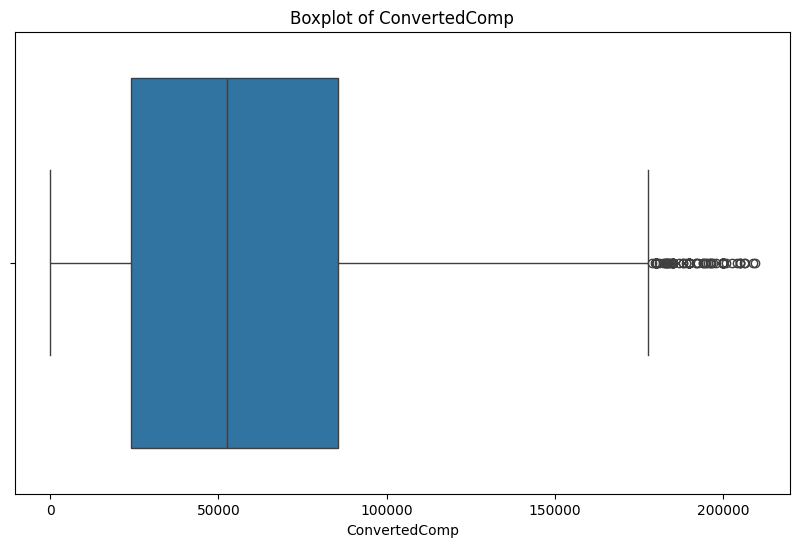

In [14]:
# Create a boxplot for the ConvertedComp column
plt.figure(figsize=(10, 6))
sns.boxplot(x=df_no_outliers['ConvertedComp'])
plt.title("Boxplot of ConvertedComp")
plt.xlabel("ConvertedComp")
plt.show()

### Find the correlation between `Age` and all other numerical columns.


In [15]:
# correlation matrix only for other numerical columns 
correlation_matrix = p3_df.select_dtypes(include=[np.number]).corr()

# sort the matrix by 'Age' in descending order and print results
sorted_correlation_matrix = correlation_matrix['Age'].sort_values(ascending=False)
print(sorted_correlation_matrix)

Age              1.000000
ConvertedComp    0.105386
WorkWeekHrs      0.036518
CompTotal        0.006970
Respondent       0.004041
CodeRevHrs      -0.020469
Name: Age, dtype: float64


### Without outputting a correlation matrix, find the column with the highest correlation with `Age` (besides `Age` itself) and the column with the lowest (includes negative) correlation with `Age`.

In [16]:
# Extract the correlation values for the 'Age' column
age_correlation = correlation_matrix['Age']

# Exclude 'Age' from the results
age_correlation = age_correlation.drop('Age')

# Find the column with the highest correlation with 'Age'
highest_correlation_column = age_correlation.idxmax()
highest_correlation_value = age_correlation.max()

# Find the column with the lowest correlation with 'Age'
lowest_correlation_column = age_correlation.idxmin()
lowest_correlation_value = age_correlation.min()

# Display results
print(f"Column with the highest correlation with 'Age': {highest_correlation_column} (Correlation: {highest_correlation_value})")
print(f"Column with the lowest correlation with 'Age': {lowest_correlation_column} (Correlation: {lowest_correlation_value})")


Column with the highest correlation with 'Age': ConvertedComp (Correlation: 0.10538616072629158)
Column with the lowest correlation with 'Age': CodeRevHrs (Correlation: -0.020469111970030138)


# IBM Data Analyst Professional Certificate: Capstone Project | **Part 4 - Data Visualization**

### Using the URL below, download the SQLite database:

**https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DA0321EN-SkillsNetwork/LargeData/m4_survey_data.sqlite**

In [17]:
db_url = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DA0321EN-SkillsNetwork/LargeData/m4_survey_data.sqlite' # m4_survey_data.sqlite is m1_survey_data.csv loaded into a database
db_file = 'm4_survey_data.sqlite'

# Download the SQLite database file
urllib.request.urlretrieve(db_url, db_file)
print(f"Successfully downloaded {db_file} to: {current_directory}")

Successfully downloaded m4_survey_data.sqlite to: c:\Users\_\Desktop\Coursera_Certs\IBM_DA_Prof_Cert\09_Capstone_Project


### Establish a connection to the SQLite database and write a query to print the names of all tables in the database.

In [18]:
# Connect to the SQLite database
conn = sqlite3.connect(db_file)

# Query to get the names of all tables in the database
query = """
SELECT name AS Database_Table_Names FROM
sqlite_master WHERE
type = 'table'
"""
# The read_sql_query runs the sql query and returns the result as a dataframe
pd.read_sql_query(query,conn)

,Database_Table_Names
0,EduOther
1,DevType
2,LastInt
3,JobFactors
4,WorkPlan
5,WorkChallenge
6,LanguageWorkedWith
7,LanguageDesireNextYear
8,DatabaseWorkedWith
9,DatabaseDesireNextYear


### Load the SQL extension (enabling line/cell magic) and use SQL cell magic to select the first 2 rows in the `DevType` table

In [ ]:
%load_ext sql

In [26]:
%%sql sqlite:///m4_survey_data.sqlite
SELECT * FROM DevType LIMIT 2

Done.


Respondent,DevType
4,"Developer, full-stack"
9,Database administrator


### Find the majority `DevType` and the count of respondents reporting this role.

In [27]:
# Define the query to get the count of each DevType
query = """
SELECT DevType, COUNT(*) AS count 
FROM DevType 
GROUP BY DevType 
ORDER BY count DESC 
LIMIT 1;
"""

# Execute the query and store the result in a DataFrame
result_df = pd.read_sql_query(query, conn)

# Fetch the counts from the DataFrame
majority_devtype = result_df.iloc[0]

# Print the result
print(f"The majority DevType is: {majority_devtype['DevType']} with {majority_devtype['count']} respondents")

The majority DevType is: Developer, full-stack with 6928 respondents


### Find the number of respondents who indicated they work with 'SQL'

In [28]:
# Define the query
query = """
SELECT COUNT(*) AS sql_users_count
FROM LanguageWorkedWith
WHERE LanguageWorkedWith LIKE '%SQL%'
"""

# Execute the query and read the result into a DataFrame
result_df = pd.read_sql_query(query, conn)

# Fetch the count from the DataFrame
count_sql_users = result_df['sql_users_count'][0]

# Print the result
print(f"Number of respondents who indicated that they work with SQL: {count_sql_users}")

Number of respondents who indicated that they work with SQL: 7106


### Use SQL cell magic to select the first 2 rows in the `master` table

In [29]:
%%sql sqlite:///m4_survey_data.sqlite
SELECT * FROM master LIMIT 2

Done.


index,Respondent,MainBranch,Hobbyist,OpenSourcer,OpenSource,Employment,Country,Student,EdLevel,UndergradMajor,OrgSize,YearsCode,Age1stCode,YearsCodePro,CareerSat,JobSat,MgrIdiot,MgrMoney,MgrWant,JobSeek,LastHireDate,FizzBuzz,ResumeUpdate,CurrencySymbol,CurrencyDesc,CompTotal,CompFreq,ConvertedComp,WorkWeekHrs,WorkRemote,WorkLoc,ImpSyn,CodeRev,CodeRevHrs,UnitTests,PurchaseHow,PurchaseWhat,OpSys,BlockchainOrg,BlockchainIs,BetterLife,ITperson,OffOn,SocialMedia,Extraversion,ScreenName,SOVisit1st,SOVisitFreq,SOFindAnswer,SOTimeSaved,SOHowMuchTime,SOAccount,SOPartFreq,SOJobs,EntTeams,SOComm,WelcomeChange,Age,Trans,Dependents,SurveyLength,SurveyEase
0,4,I am a developer by profession,No,Never,The quality of OSS and closed source software is about the same,Employed full-time,United States,No,"Bachelor’s degree (BA, BS, B.Eng., etc.)","Computer science, computer engineering, or software engineering",100 to 499 employees,3,16,Less than 1 year,Very satisfied,Slightly satisfied,Very confident,No,Not sure,I am not interested in new job opportunities,Less than a year ago,No,I was preparing for a job search,USD,United States dollar,61000.0,Yearly,61000.0,80.0,Less than once per month / Never,Home,A little below average,No,None,"No, but I think we should",Developers typically have the most influence on purchasing new technology,I have little or no influence,Windows,Not at all,"Useful for decentralized currency (i.e., Bitcoin)",Yes,SIGH,Yes,Reddit,In real life (in person),Username,2014,Daily or almost daily,1-2 times per week,Stack Overflow was much faster,31-60 minutes,Yes,Less than once per month or monthly,Yes,"No, and I don't know what those are","No, not really",Just as welcome now as I felt last year,22.0,No,No,Appropriate in length,Easy
1,9,I am a developer by profession,Yes,Once a month or more often,The quality of OSS and closed source software is about the same,Employed full-time,New Zealand,No,Some college/university study without earning a degree,"Computer science, computer engineering, or software engineering",10 to 19 employees,12,11,4,Slightly satisfied,Slightly satisfied,Somewhat confident,No,Not sure,"I’m not actively looking, but I am open to new opportunities",Less than a year ago,Yes,I was preparing for a job search,NZD,New Zealand dollar,138000.0,Yearly,95179.0,32.0,Less than once per month / Never,Office,A little above average,"Yes, because I see value in code review",12.0,"Yes, it's not part of our process but the developers do it on their own",Not sure,I have some influence,MacOS,Not at all,An irresponsible use of resources,No,SIGH,Yes,Twitter,In real life (in person),Username,2013,Daily or almost daily,3-5 times per week,They were about the same,None,Yes,Less than once per month or monthly,"No, I knew that Stack Overflow had a job board but have never used or visited it","No, and I don't know what those are","Yes, somewhat",Just as welcome now as I felt last year,23.0,No,No,Appropriate in length,Neither easy nor difficult


### Create a box plot of `Age`.

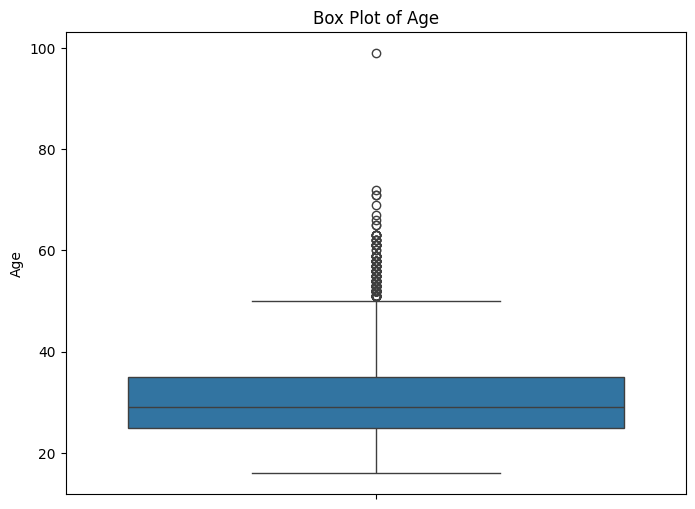

In [30]:
# Query to extract Age from the master table
query = "SELECT Age FROM master;"
result_df = pd.read_sql_query(query, conn)

# Create a box plot of Age
plt.figure(figsize=(8, 6))
sns.boxplot(result_df['Age'].dropna())  # dropna to handle any NaN/missing values
plt.title('Box Plot of Age')
plt.ylabel('Age')
plt.grid(False)
plt.show()

### Create a scatter plot of `Age` and `WorkWeekHrs`.

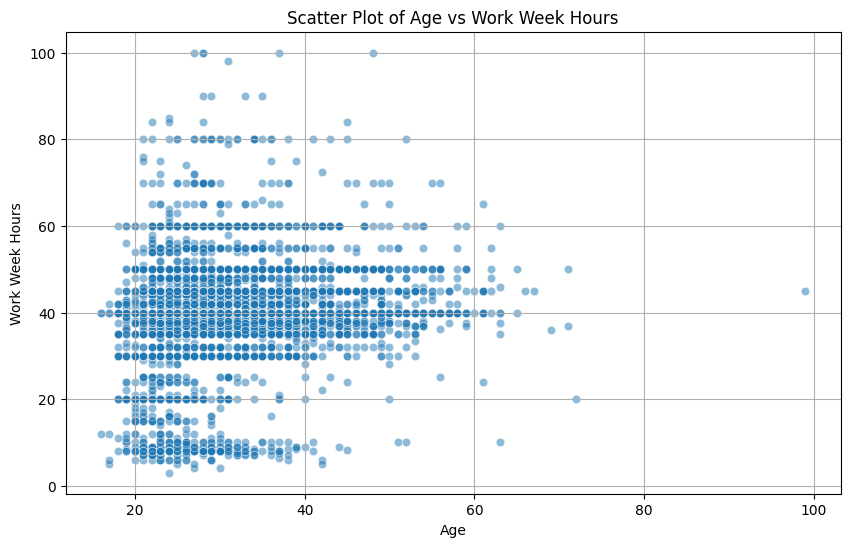

In [31]:
# Query to extract Age and WorkWeekHrs from the master table
query = "SELECT Age, WorkWeekHrs FROM master;"
result_df = pd.read_sql_query(query, conn)

# Filter the DataFrame to ignore Work Week Hours > 112
result_df = result_df[result_df['WorkWeekHrs'] <= 112]

# Create a scatter plot
plt.figure(figsize=(10, 6))
sns.scatterplot(data=result_df, x='Age', y='WorkWeekHrs', alpha=0.5)
plt.title('Scatter Plot of Age vs Work Week Hours')
plt.xlabel('Age')
plt.ylabel('Work Week Hours')
plt.grid()
plt.show()

### Create a bubble plot of `WorkWeekHrs` and `CodeRevHrs`, use `Age` column as bubble size.

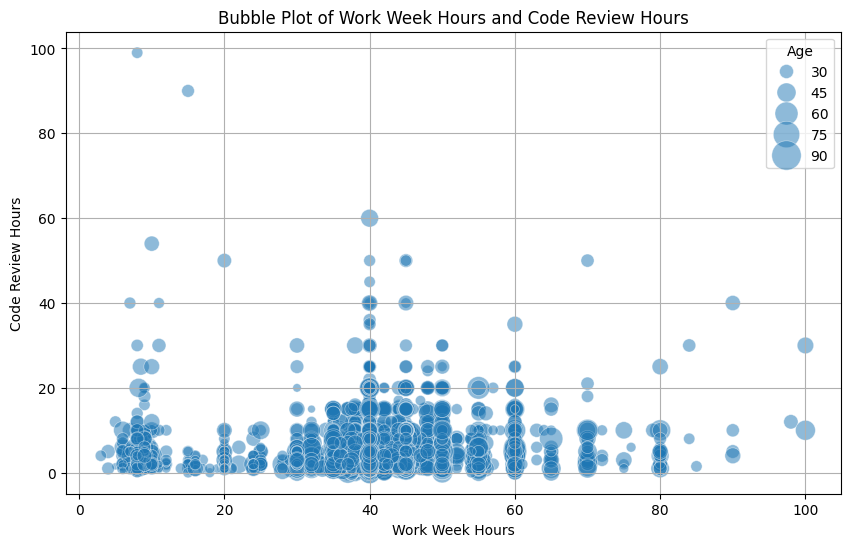

In [32]:
# Query to extract Age from the master table
query = "SELECT Age, CodeRevHrs, WorkWeekHrs FROM master;"
result_df = pd.read_sql_query(query, conn)

# Filter the DataFrame to ignore Work Week Hours > 112
result_df = result_df[result_df['WorkWeekHrs'] <= 112]

# Create a bubble plot
plt.figure(figsize=(10, 6))
sns.scatterplot(data=result_df, 
                x='WorkWeekHrs', 
                y='CodeRevHrs', 
                size='Age',  # Bubble size based on Age
                sizes=(20, 500),  # Size range for bubbles
                alpha=0.5,
                edgecolor='w',  # white edges for better visibility
                linewidth=0.5)

# Add titles and labels
plt.title('Bubble Plot of Work Week Hours and Code Review Hours')
plt.xlabel('Work Week Hours')
plt.ylabel('Code Review Hours')

# Show plot
plt.grid(True)
plt.show()

### Create a pie chart of the top 5 databases that respondents wish to learn next year. Label the pie chart with database names. Display percentages of each database on the pie chart.

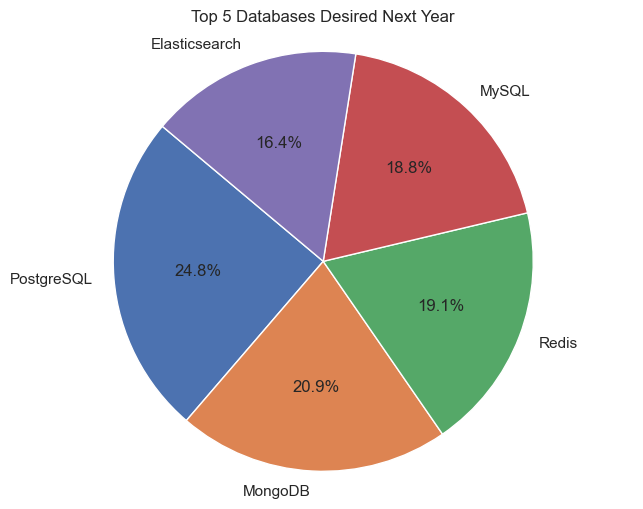

In [33]:
# Execute a query to get the top 5 databases from the DatabaseDesireNextYear table
query = """
SELECT DatabaseDesireNextYear, COUNT(*) as count 
FROM DatabaseDesireNextYear 
GROUP BY DatabaseDesireNextYear 
ORDER BY count DESC 
LIMIT 5;
"""

# Use read_sql_query to load the results into a DataFrame
result_df = pd.read_sql_query(query, conn)

# Prepare data for plotting
databases = result_df['DatabaseDesireNextYear']
counts = result_df['count']

# Set Seaborn style
sns.set_theme(style="whitegrid")

# Create a pie chart
plt.figure(figsize=(8, 6))
plt.pie(counts, labels=databases, autopct='%1.1f%%', startangle=140)
plt.title('Top 5 Databases Desired Next Year')
plt.axis('equal')  # Equal aspect ratio ensures that pie chart is a circle.
plt.show()

### Create a stacked column chart of median `WorkWeekHrs` and `CodeRevHrs` for all observed ages from 0-100 in age groups separated 10 years apart.

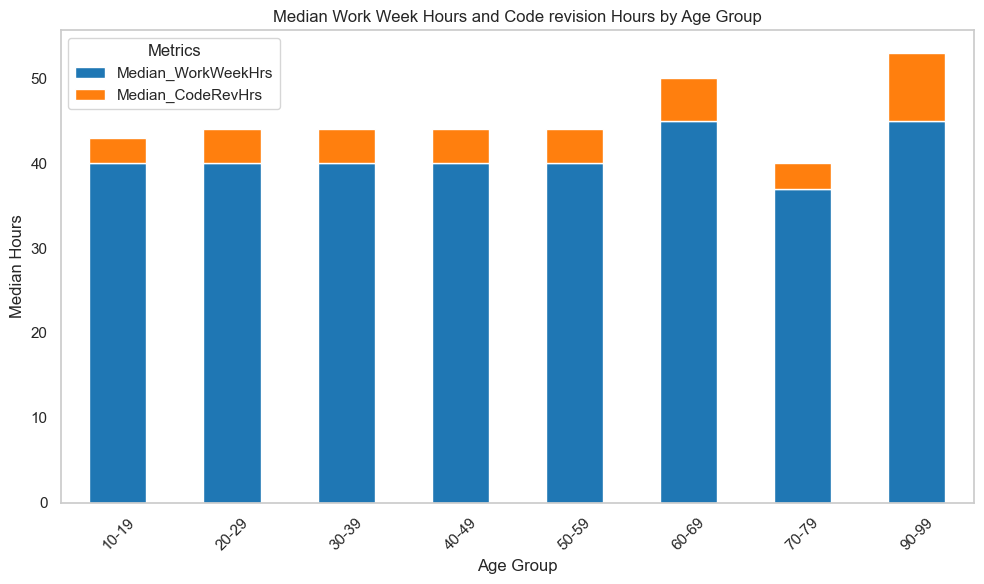

In [34]:
# Query the data from the master table
query = """
SELECT Age, WorkWeekHrs, CodeRevHrs 
FROM master
"""
result_df = pd.read_sql_query(query, conn)

# Define age bins
bins = range(0, 101, 10)  # Bins for ages from 0 to 100 in intervals of 10
labels = [f"{i}-{i + 9}" for i in bins[:-1]]  # Create labels for bins

# Bin the Age column
result_df['Age_bin'] = pd.cut(result_df['Age'], bins=bins, labels=labels, right=False)

# Filter the DataFrame to ignore Work Week Hours > 112
result_df = result_df[result_df['WorkWeekHrs'] <= 112]

# Calculate median of WorkWeekHrs and CodeRevHrs for each age bin
median_data = result_df.groupby('Age_bin', observed=True).agg(
    Median_WorkWeekHrs=('WorkWeekHrs', 'median'),
    Median_CodeRevHrs=('CodeRevHrs', 'median')
).reset_index()

# Plotting the stacked bar chart
median_data.plot(x='Age_bin', kind='bar', stacked=True, 
                 color=['#1f77b4', '#ff7f0e'], figsize=(10, 6))

plt.title('Median Work Week Hours and Code revision Hours by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Median Hours')
plt.legend(title='Metrics')
plt.xticks(rotation=45)
plt.grid(False)
plt.tight_layout()
plt.show()

### Create a line chart of the median `ConvertedComp` for all ages from 45 to 60.

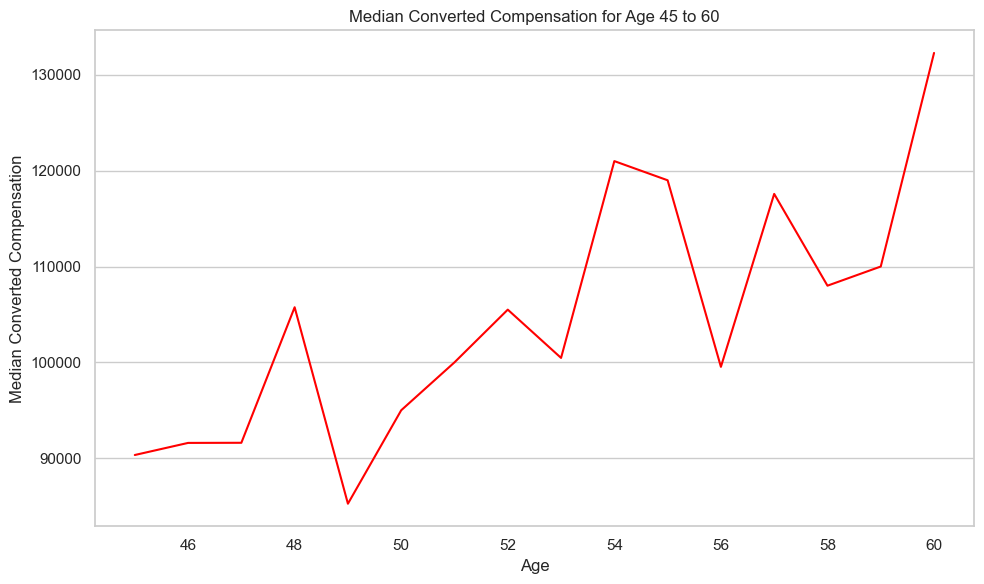

In [35]:
# Load data from the 'master' table into a Pandas DataFrame
query = "SELECT Age, ConvertedComp FROM master WHERE Age BETWEEN 45 AND 60;"
result_df = pd.read_sql_query(query, conn)

# Calculate the median ConvertedComp for each Age
median_comp = result_df.groupby('Age')['ConvertedComp'].median()

# Plot the median ConvertedComp for Ages from 45 to 60
plt.figure(figsize=(10, 6))
median_comp.plot(kind='line', color='red')
plt.title('Median Converted Compensation for Age 45 to 60')
plt.xlabel('Age')
plt.ylabel('Median Converted Compensation')
plt.grid(axis='x')
plt.tight_layout()
plt.show()


### Create a horizontal bar chart using column `MainBranch`.

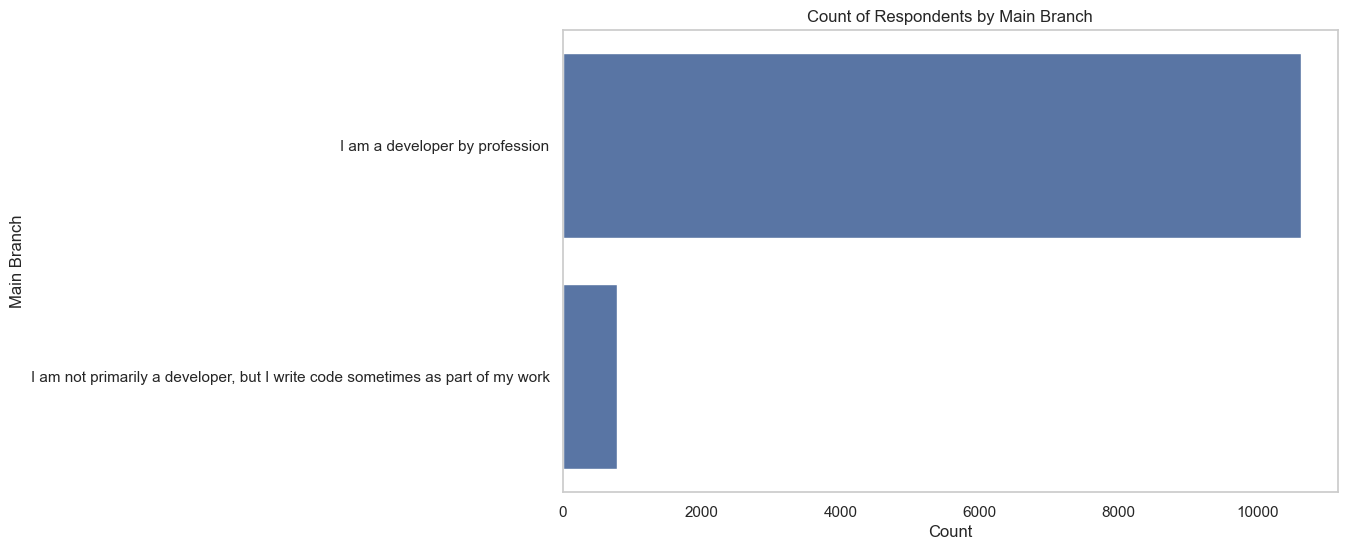

In [36]:
# Query to get counts of each unique value in the MainBranch column from the master table
QUERY = """
SELECT MainBranch, COUNT(*) as Count
FROM master
GROUP BY MainBranch
"""
result_df = pd.read_sql_query(QUERY, conn)

# Plotting the horizontal bar chart
plt.figure(figsize=(10, 6))
sns.barplot(x='Count', y='MainBranch', data=result_df)
plt.xlabel('Count')
plt.ylabel('Main Branch')
plt.title('Count of Respondents by Main Branch')
plt.grid(False)
plt.show()

### Close the database connection.

In [37]:
conn.close()

# IBM Data Analyst Professional Certificate: Capstone Project | **Part 5 - Tableau Dashboard**

**https://public.tableau.com/app/profile/alexander.j.porter/viz/2019DeveloperSurveyDashboard/CurrentTechUsage**

# IBM Data Analyst Professional Certificate: Capstone Project | **Part 6 - Presentation**

### The PDF version of the PowerPoint presentation is accessible from the project repository as well as directly from the URL below:

**https://github.com/Alexander-J-Porter/IBM-Data-Analyst-End-to-End-Project-using-Python-SQL-Tableau/blob/main/IBM_Capstone_Presentation.pdf**